# Executive Summary

The goal of this project is to build supervised models to identify fraudulent events in the credit card transactions of companies in Tenness during the year of 2010. This notebook is divided into following parts:  <br />
<pre>
    1. Executive Summary
    2. Exploratory Data Analysis
    3. Data Cleaning
    4. Feature Engineering
    5. Feature Selection
    6. Models
    7. Results
</pre>

# Exploratory Data Analysis

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('cardtransactions.xlsx')

In [3]:
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [4]:
print("The dataset has", df.shape[0], "rows and", df.shape[1],"columns." )

The dataset has 96753 rows and 10 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
Recnum               96753 non-null int64
Cardnum              96753 non-null int64
Date                 96753 non-null datetime64[ns]
Merchnum             93378 non-null object
Merch description    96753 non-null object
Merch state          95558 non-null object
Merch zip            92097 non-null float64
Transtype            96753 non-null object
Amount               96753 non-null float64
Fraud                96753 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 7.4+ MB


## Cardnum

In [6]:
# The number of transactions under each card number
df['Cardnum'].value_counts().head()

5142148452    1192
5142184598     921
5142189108     663
5142297710     583
5142223373     579
Name: Cardnum, dtype: int64

In [7]:
# The number of unique card number in the dataset
print("There are", len(df['Cardnum'].unique()), "unique card number in the dataset")

There are 1645 unique card number in the dataset


## Date

In [8]:
df['Date'].value_counts().head()

2010-02-28    684
2010-08-10    610
2010-03-15    594
2010-09-13    564
2010-08-09    536
Name: Date, dtype: int64

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


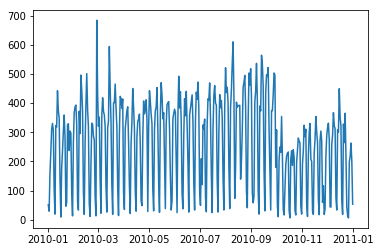

In [9]:
# The number of transactions by date
plt.plot(df['Date'].value_counts().sort_index());

In [10]:
print("There are", len(df['Date'].unique()), "days in the dataset")

There are 365 days in the dataset


## Merchant Number

In [11]:
df['Merchnum'].value_counts().head()

930090121224     9310
5509006296254    2131
9900020006406    1714
602608969534     1092
4353000719908    1020
Name: Merchnum, dtype: int64

In [12]:
df[df['Merchnum'].isnull()].head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
97,98,5142167414,2010-01-03,NaN,CONVENIENCE CHECK FEE(%),NaN,NaN,D,89.00,0
115,116,5142182128,2010-01-03,NaN,GRAINGER #973,IL,60089.0,P,327.34,0
135,136,5142126842,2010-01-03,NaN,AUTOMATED OFFICE PRODU,MD,20706.0,P,2110.00,0
163,164,5142127276,2010-01-03,NaN,CONVENIENCE CHECK FEE(%),NaN,NaN,D,4444.00,0
168,169,5142132574,2010-01-03,NaN,ROLL CALL NEWSPAPER,DC,20001.0,P,104.69,0


In [13]:
print("There are", len(df['Merchnum'].unique()), "merchants in the dataset.")

There are 13092 merchants in the dataset.


In [14]:
print("There are",sum(df['Merchnum'].isnull()),"NAs in merchant number.")

There are 3375 NAs in merchant number.


## Merch State

In [15]:
df['Merch state'].value_counts().head()

TN    12035
VA     7872
CA     6817
IL     6508
MD     5398
Name: Merch state, dtype: int64

In [16]:
df[df['Merch state'].isnull()].head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
97,98,5142167414,2010-01-03,NaN,CONVENIENCE CHECK FEE(%),NaN,NaN,D,89.00,0
163,164,5142127276,2010-01-03,NaN,CONVENIENCE CHECK FEE(%),NaN,NaN,D,4444.00,0
262,263,5142257575,2010-01-04,NaN,RETAIL DEBIT ADJUSTMENT,NaN,NaN,P,320.00,0
272,273,5142124791,2010-01-04,NaN,RETAIL DEBIT ADJUSTMENT,NaN,NaN,P,970.00,0
400,401,5142276099,2010-01-04,NaN,RETAIL DEBIT ADJUSTMENT,NaN,NaN,P,82.59,0


In [17]:
print("There are",len(df['Merch state'].unique()),"states in the dataset.")
#Something is wrong with the merchant state column, which needs to be paid attention to at data cleaning

There are 228 states in the dataset.


## Merch Zip

In [18]:
df['Merch zip'].value_counts().head()

38118.0    11868
63103.0     1650
8701.0      1267
22202.0     1250
60061.0     1221
Name: Merch zip, dtype: int64

In [19]:
print("There are", len(df['Merch zip'].unique()), "zip codes in the dataset.")

There are 4568 zip codes in the dataset.


In [20]:
df[df['Merch zip'].isnull()].head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
51,52,5142204384,2010-01-02,5000006000095,IBM INTERNET 01000025,NY,NaN,P,20.15,0
54,55,5142146340,2010-01-02,5000006000095,IBM INTERNET 01000025,NY,NaN,P,23.90,0
55,56,5142260984,2010-01-02,5000006000095,IBM INTERNET 01000025,NY,NaN,P,19.95,0
58,59,5142204384,2010-01-02,5000006000095,IBM INTERNET 01000025,NY,NaN,P,20.15,0
59,60,5142204384,2010-01-02,5000006000095,IBM INTERNET 01000025,NY,NaN,P,20.15,0


## Amount

In [21]:
df['Amount'].describe()

count    9.675300e+04
mean     4.278857e+02
std      1.000614e+04
min      1.000000e-02
25%      3.348000e+01
50%      1.379800e+02
75%      4.282000e+02
max      3.102046e+06
Name: Amount, dtype: float64

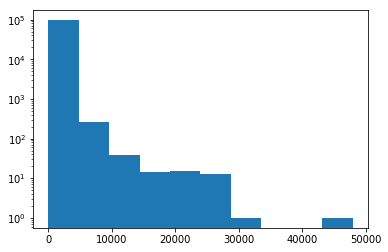

In [22]:
# print the distribution of amount excluding outlier on a log scale 
plt.hist(df.loc[df['Amount'] != max(df['Amount']),'Amount'])
plt.yscale('log')

## Fraud

In [23]:
# imbalanced dataset with few frauds
df['Fraud'].value_counts()

0    95694
1     1059
Name: Fraud, dtype: int64

# Data Cleaning

Some data cleaning to do: <br />
<pre>
    1. Include only Transaction type of P
    2. Exclude the record with max amount
    3. Set unusual merchant state as 'other'
    4. Fill missing values
</pre>

In [24]:
df = df[(df['Transtype'] == 'P') & (df['Amount'] != max(df['Amount']))]

In [25]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [26]:
df.loc[(~df['Merch state'].isin(states) & (~df['Merch state'].isnull())),'Merch state' ] = 'other'

In [27]:
len(df['Merch state'].unique()) # 51 states plus nan and other

53

In [28]:
# fill merch state
state_ref = df.groupby('Merch zip')['Merch state'].apply(lambda x: x.mode()).reset_index()
state_ref = state_ref[state_ref['level_1']==0].iloc[:,[0,2]]
state_ref.columns = ['Merch zip','state ref']

In [29]:
df = df.merge(state_ref, on='Merch zip',how='left')
df['Merch state'] = df['Merch state'].fillna(df['state ref']).fillna('TN')

In [30]:
sum(df['Merch state'].isnull())

0

In [31]:
# fill merch zip
zip_ref = df.groupby(["Merch state","Cardnum"])['Merch zip'].apply(lambda x: x.mode()).reset_index()
zip_ref = zip_ref[zip_ref.level_2==0].iloc[:,[0,1,3]]
zip_ref.columns = ["Merch state","Cardnum","zip ref"]

In [32]:
df = df.merge(zip_ref, on=["Merch state","Cardnum"],how='left')

In [33]:
zip_ref2 = df.groupby(["Merch state"])['Merch zip'].apply(lambda x: x.mode()).reset_index()
zip_ref2 = zip_ref2[zip_ref2.level_1==0].iloc[:,[0,2]]
zip_ref2.columns = ["Merch state","zip ref2"]

In [34]:
df = df = df.merge(zip_ref2, on=["Merch state"],how='left')

In [35]:
df['Merch zip'] = df['Merch zip'].fillna(df['zip ref']).fillna(df['zip ref2']).fillna(df['Merch zip'].mode().values[0])

In [36]:
sum(df['Merch zip'].isnull())

0

In [37]:
merch_ref = df.groupby(['Merch state','Cardnum'])['Merchnum'].apply(lambda x: x.mode()).reset_index()
merch_ref = merch_ref[merch_ref.level_2 == 0].iloc[:,[0,1,3]]
merch_ref.columns = ["Merch state","Cardnum","merch ref"]

df = df.merge(merch_ref, on=['Merch state','Cardnum'],how='left')

merch_ref2 = df.groupby(['Merch state'])['Merchnum'].apply(lambda x: x.mode()).reset_index()
merch_ref2 = merch_ref2[merch_ref2.level_1 == 0].iloc[:,[0,2]]
merch_ref2.columns = ["Merch state","merch ref2"]

df = df.merge(merch_ref2, on=['Merch state'],how='left')

In [38]:
df['Merchnum'] = df['Merchnum'].fillna(df['merch ref']).fillna(df['merch ref2']).fillna(df['Merchnum'].mode().values[0])

In [39]:
sum(df['Merchnum'].isnull())

0

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96396
Data columns (total 15 columns):
Recnum               96397 non-null int64
Cardnum              96397 non-null int64
Date                 96397 non-null datetime64[ns]
Merchnum             96397 non-null object
Merch description    96397 non-null object
Merch state          96397 non-null object
Merch zip            96397 non-null float64
Transtype            96397 non-null object
Amount               96397 non-null float64
Fraud                96397 non-null int64
state ref            92030 non-null object
zip ref              95195 non-null float64
zip ref2             96205 non-null float64
merch ref            95336 non-null object
merch ref2           96397 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 11.8+ MB


In [41]:
df = df.drop(columns=['state ref','zip ref','zip ref2','merch ref','merch ref2','Merch description','Transtype'])

In [63]:
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch state,Merch zip,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,TN,38118.0,3.62,0
1,2,5142183973,2010-01-01,61003026333,MA,1803.0,31.42,0
2,3,5142131721,2010-01-01,4503082993600,MD,20706.0,178.49,0
3,4,5142148452,2010-01-01,5509006296254,TN,38118.0,3.62,0
4,5,5142190439,2010-01-01,5509006296254,TN,38118.0,3.62,0


# Feature Engineering

There are four types of variables to create: amount variable, frequency variable, recency variable and velocity change variable. Groups include card number, merchant number, card number and merchant zip code. <br />
<pre>
Amount Variable: for each group, the average, maximum, total amount over the past 1, 7 and 14 days
Frequency Variable: for each group, the number of transactions over the past 1, 7 and 14 days
Recency Variable: for each group, the difference between current date and most recent transaction date

<pre/>

In [66]:
df.set_index('Date',inplace=True)

In [67]:
df.head()

,Recnum,Cardnum,Merchnum,Merch state,Merch zip,Amount,Fraud
Date,,,,,,,
2010-01-01,1,5142190439,5509006296254,TN,38118.0,3.62,0
2010-01-01,2,5142183973,61003026333,MA,1803.0,31.42,0
2010-01-01,3,5142131721,4503082993600,MD,20706.0,178.49,0
2010-01-01,4,5142148452,5509006296254,TN,38118.0,3.62,0
2010-01-01,5,5142190439,5509006296254,TN,38118.0,3.62,0


## Amount Variable

### By Cardnum

In [68]:
avg_card_1 = df.groupby(['Cardnum'])['Amount'].rolling('1d').mean().reset_index()
avg_card_1['order'] = avg_card_1.groupby(['Cardnum', 'Date']).cumcount() + 1
avg_card_7 = df.groupby(['Cardnum'])['Amount'].rolling('7d').mean().reset_index()
avg_card_7['order'] = avg_card_7.groupby(['Cardnum', 'Date']).cumcount() + 1
avg_card_14 = df.groupby(['Cardnum'])['Amount'].rolling('14d').mean().reset_index()
avg_card_14['order'] = avg_card_14.groupby(['Cardnum', 'Date']).cumcount() + 1

max_card_1 = df.groupby(['Cardnum'])['Amount'].rolling('1d').max().reset_index()
max_card_1['order'] = max_card_1.groupby(['Cardnum', 'Date']).cumcount() + 1
max_card_7 = df.groupby(['Cardnum'])['Amount'].rolling('7d').max().reset_index()
max_card_7['order'] = max_card_7.groupby(['Cardnum', 'Date']).cumcount() + 1
max_card_14 = df.groupby(['Cardnum'])['Amount'].rolling('14d').max().reset_index()
max_card_14['order'] = max_card_14.groupby(['Cardnum', 'Date']).cumcount() + 1

sum_card_1 = df.groupby(['Cardnum'])['Amount'].rolling('1d').sum().reset_index()
sum_card_1['order'] = sum_card_1.groupby(['Cardnum', 'Date']).cumcount() + 1
sum_card_7 = df.groupby(['Cardnum'])['Amount'].rolling('7d').sum().reset_index()
sum_card_7['order'] = sum_card_7.groupby(['Cardnum', 'Date']).cumcount() + 1
sum_card_14 = df.groupby(['Cardnum'])['Amount'].rolling('14d').sum().reset_index()
sum_card_14['order'] = sum_card_14.groupby(['Cardnum', 'Date']).cumcount() + 1

In [69]:
card_amount = df.copy()
card_amount  = card_amount.reset_index()
card_amount['order'] = card_amount.groupby(['Cardnum', 'Date']).cumcount() + 1
card_amount = card_amount[['Date','Cardnum','Amount','order']]

In [70]:
merged_card_amount = card_amount \
.merge(avg_card_1, on = ['Date', 'Cardnum', 'order'], how = 'left', suffixes=['', '_avg_card_1']) \
.merge(avg_card_7, on = ['Date', 'Cardnum', 'order'], how = 'left', suffixes=['', '_avg_card_7']) \
.merge(avg_card_14, on = ['Date', 'Cardnum', 'order'], how = 'left', suffixes=['', '_avg_card_14']) \
.merge(max_card_1, on = ['Date', 'Cardnum', 'order'], how = 'left', suffixes=['', '_max_card_1'])\
.merge(max_card_7, on = ['Date', 'Cardnum', 'order'], how = 'left', suffixes=['', '_max_card_7']) \
.merge(max_card_14, on = ['Date', 'Cardnum', 'order'], how = 'left', suffixes=['', '_max_card_14']) \
.merge(sum_card_1, on = ['Date', 'Cardnum', 'order'], how = 'left', suffixes=['', '_sum_card_1'])\
.merge(sum_card_7, on = ['Date', 'Cardnum', 'order'], how = 'left', suffixes=['', '_sum_card_7']) \
.merge(sum_card_14, on = ['Date', 'Cardnum', 'order'], how = 'left', suffixes=['', '_sum_card_14']) 

In [71]:
merged_card_amount.head()

,Date,Cardnum,Amount,order,Amount_avg_card_1,Amount_avg_card_7,Amount_avg_card_14,Amount_max_card_1,Amount_max_card_7,Amount_max_card_14,Amount_sum_card_1,Amount_sum_card_7,Amount_sum_card_14
0,2010-01-01,5142190439,3.62,1,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
1,2010-01-01,5142183973,31.42,1,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42
2,2010-01-01,5142131721,178.49,1,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49
3,2010-01-01,5142148452,3.62,1,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
4,2010-01-01,5142190439,3.62,2,3.62,3.62,3.62,3.62,3.62,3.62,7.24,7.24,7.24


### Merchant Number

In [72]:
avg_merchant_1 = df.groupby(['Merchnum'])['Amount'].rolling('1d').mean().reset_index()
avg_merchant_1['order'] = avg_merchant_1.groupby(['Merchnum', 'Date']).cumcount() + 1
avg_merchant_7 = df.groupby(['Merchnum'])['Amount'].rolling('7d').mean().reset_index()
avg_merchant_7['order'] = avg_merchant_7.groupby(['Merchnum', 'Date']).cumcount() + 1
avg_merchant_14 = df.groupby(['Merchnum'])['Amount'].rolling('14d').mean().reset_index()
avg_merchant_14['order'] = avg_merchant_14.groupby(['Merchnum', 'Date']).cumcount() + 1

max_merchant_1 = df.groupby(['Merchnum'])['Amount'].rolling('1d').max().reset_index()
max_merchant_1['order'] = max_merchant_1.groupby(['Merchnum', 'Date']).cumcount() + 1
max_merchant_7 = df.groupby(['Merchnum'])['Amount'].rolling('7d').max().reset_index()
max_merchant_7['order'] = max_merchant_7.groupby(['Merchnum', 'Date']).cumcount() + 1
max_merchant_14 = df.groupby(['Merchnum'])['Amount'].rolling('14d').max().reset_index()
max_merchant_14['order'] = max_merchant_14.groupby(['Merchnum', 'Date']).cumcount() + 1

sum_merchant_1 = df.groupby(['Merchnum'])['Amount'].rolling('1d').sum().reset_index()
sum_merchant_1['order'] = sum_merchant_1.groupby(['Merchnum', 'Date']).cumcount() + 1
sum_merchant_7 = df.groupby(['Merchnum'])['Amount'].rolling('7d').sum().reset_index()
sum_merchant_7['order'] = sum_merchant_7.groupby(['Merchnum', 'Date']).cumcount() + 1
sum_merchant_14 = df.groupby(['Merchnum'])['Amount'].rolling('14d').sum().reset_index()
sum_merchant_14['order'] = sum_merchant_14.groupby(['Merchnum', 'Date']).cumcount() + 1

In [73]:
merchant_amount = df.copy()
merchant_amount  = merchant_amount.reset_index()
merchant_amount['order'] = merchant_amount.groupby(['Merchnum', 'Date']).cumcount() + 1
merchant_amount = merchant_amount[['Date','Merchnum','Amount','order']]

In [74]:
merged_amount_merchant = merchant_amount \
.merge(avg_merchant_1, on = ['Date', 'Merchnum', 'order'], how = 'left', suffixes=['', '_avg_merchant_1'])\
.merge(avg_merchant_7, on = ['Date', 'Merchnum', 'order'], how = 'left', suffixes=['', '_avg_merchant_7']) \
.merge(avg_merchant_14, on = ['Date', 'Merchnum', 'order'], how = 'left', suffixes=['', '_avg_merchant_14']) \
.merge(max_merchant_1, on = ['Date', 'Merchnum', 'order'], how = 'left', suffixes=['', '_max_merchant_1'])\
.merge(max_merchant_7, on = ['Date', 'Merchnum', 'order'], how = 'left', suffixes=['', '_max_merchant_7']) \
.merge(max_merchant_14, on = ['Date', 'Merchnum', 'order'], how = 'left', suffixes=['', '_max_merchant_14']) \
.merge(sum_merchant_1, on = ['Date', 'Merchnum', 'order'], how = 'left', suffixes=['', '_sum_merchant_1'])\
.merge(sum_merchant_7, on = ['Date', 'Merchnum', 'order'], how = 'left', suffixes=['', '_sum_merchant_7']) \
.merge(sum_merchant_14, on = ['Date', 'Merchnum', 'order'], how = 'left', suffixes=['', '_sum_merchant_14']) 

In [75]:
merged_amount_merchant.head()

,Date,Merchnum,Amount,order,Amount_avg_merchant_1,Amount_avg_merchant_7,Amount_avg_merchant_14,Amount_max_merchant_1,Amount_max_merchant_7,Amount_max_merchant_14,Amount_sum_merchant_1,Amount_sum_merchant_7,Amount_sum_merchant_14
0,2010-01-01,5509006296254,3.62,1,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
1,2010-01-01,61003026333,31.42,1,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42
2,2010-01-01,4503082993600,178.49,1,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49
3,2010-01-01,5509006296254,3.62,2,3.62,3.62,3.62,3.62,3.62,3.62,7.24,7.24,7.24
4,2010-01-01,5509006296254,3.62,3,3.62,3.62,3.62,3.62,3.62,3.62,10.86,10.86,10.86


### Cardnum and Zip code

In [76]:
avg_card_zip_1 = df.groupby(['Cardnum', 'Merch zip'])['Amount'].rolling('1d').mean().reset_index()
avg_card_zip_1['order'] = avg_card_zip_1.groupby(['Cardnum', 'Merch zip', 'Date']).cumcount() + 1
avg_card_zip_7 = df.groupby(['Cardnum', 'Merch zip'])['Amount'].rolling('7d').mean().reset_index()
avg_card_zip_7['order'] = avg_card_zip_7.groupby(['Cardnum', 'Merch zip', 'Date']).cumcount() + 1
avg_card_zip_14 = df.groupby(['Cardnum', 'Merch zip'])['Amount'].rolling('14d').mean().reset_index()
avg_card_zip_14['order'] = avg_card_zip_14.groupby(['Cardnum', 'Merch zip', 'Date']).cumcount() + 1

max_card_zip_1 = df.groupby(['Cardnum', 'Merch zip'])['Amount'].rolling('1d').max().reset_index()
max_card_zip_1['order'] = max_card_zip_1.groupby(['Cardnum', 'Merch zip', 'Date']).cumcount() + 1
max_card_zip_7 = df.groupby(['Cardnum', 'Merch zip'])['Amount'].rolling('7d').max().reset_index()
max_card_zip_7['order'] = max_card_zip_7.groupby(['Cardnum', 'Merch zip', 'Date']).cumcount() + 1
max_card_zip_14 = df.groupby(['Cardnum', 'Merch zip'])['Amount'].rolling('14d').max().reset_index()
max_card_zip_14['order'] = max_card_zip_14.groupby(['Cardnum', 'Merch zip', 'Date']).cumcount() + 1

sum_card_zip_1 = df.groupby(['Cardnum', 'Merch zip'])['Amount'].rolling('1d').sum().reset_index()
sum_card_zip_1['order'] = sum_card_zip_1.groupby(['Cardnum', 'Merch zip', 'Date']).cumcount() + 1
sum_card_zip_7 = df.groupby(['Cardnum', 'Merch zip'])['Amount'].rolling('7d').sum().reset_index()
sum_card_zip_7['order'] = sum_card_zip_7.groupby(['Cardnum', 'Merch zip', 'Date']).cumcount() + 1
sum_card_zip_14 = df.groupby(['Cardnum', 'Merch zip'])['Amount'].rolling('14d').sum().reset_index()
sum_card_zip_14['order'] = sum_card_zip_14.groupby(['Cardnum', 'Merch zip', 'Date']).cumcount() + 1


In [77]:
card_zip_amount = df.copy()
card_zip_amount = card_zip_amount.reset_index()
card_zip_amount['order'] = card_zip_amount.groupby(['Cardnum', 'Merch zip', 'Date']).cumcount() + 1
card_zip_amount = card_zip_amount[['Date','Merch zip','Cardnum','Amount','order']]

In [78]:
merged_card_zip_amount = card_zip_amount \
.merge(avg_card_zip_1, on = ['Date', 'Merch zip', 'Cardnum', 'order'], how = 'left', suffixes=['', '_avg_card_zip_1'])\
.merge(avg_card_zip_7, on = ['Date', 'Merch zip', 'Cardnum', 'order'], how = 'left', suffixes=['', '_avg_card_zip_7']) \
.merge(avg_card_zip_14, on = ['Date', 'Merch zip', 'Cardnum', 'order'], how = 'left', suffixes=['', '_avg_card_zip_14']) \
.merge(max_card_zip_1, on = ['Date', 'Merch zip', 'Cardnum', 'order'], how = 'left', suffixes=['', '_max_card_zip_1'])\
.merge(max_card_zip_7, on = ['Date', 'Merch zip', 'Cardnum', 'order'], how = 'left', suffixes=['', '_max_card_zip_7']) \
.merge(max_card_zip_14, on = ['Date', 'Merch zip', 'Cardnum', 'order'], how = 'left', suffixes=['', '_max_card_zip_14']) \
.merge(sum_card_zip_1, on = ['Date', 'Merch zip', 'Cardnum', 'order'], how = 'left', suffixes=['', '_sum_card_zip_1'])\
.merge(sum_card_zip_7, on = ['Date', 'Merch zip', 'Cardnum', 'order'], how = 'left', suffixes=['', '_sum_card_zip_7']) \
.merge(sum_card_zip_14, on = ['Date', 'Merch zip', 'Cardnum', 'order'], how = 'left', suffixes=['', '_sum_card_zip_14']) 

In [80]:
merged_card_zip_amount.head()

,Date,Merch zip,Cardnum,Amount,order,Amount_avg_card_zip_1,Amount_avg_card_zip_7,Amount_avg_card_zip_14,Amount_max_card_zip_1,Amount_max_card_zip_7,Amount_max_card_zip_14,Amount_sum_card_zip_1,Amount_sum_card_zip_7,Amount_sum_card_zip_14
0,2010-01-01,38118.0,5142190439,3.62,1,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
1,2010-01-01,1803.0,5142183973,31.42,1,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42
2,2010-01-01,20706.0,5142131721,178.49,1,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49
3,2010-01-01,38118.0,5142148452,3.62,1,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
4,2010-01-01,38118.0,5142190439,3.62,2,3.62,3.62,3.62,3.62,3.62,3.62,7.24,7.24,7.24


In [105]:
Amount = pd.concat([df,merged_card_amount.iloc[:,4:],
          merged_amount_merchant.iloc[:,4:],
          merged_card_zip_amount.iloc[:,5:]],axis=1)

## Frequency Variable

In [108]:
df.set_index('Date',inplace=True)

,Recnum,Cardnum,Merchnum,Merch state,Merch zip,Amount,Fraud,order_cardnum,order_merchnum,order_card_zip
Date,,,,,,,,,,
2010-01-01,1,5142190439,5509006296254,TN,38118.0,3.62,0,1,1,1
2010-01-01,2,5142183973,61003026333,MA,1803.0,31.42,0,1,1,1
2010-01-01,3,5142131721,4503082993600,MD,20706.0,178.49,0,1,1,1
2010-01-01,4,5142148452,5509006296254,TN,38118.0,3.62,0,1,2,1
2010-01-01,5,5142190439,5509006296254,TN,38118.0,3.62,0,2,3,2


In [ ]:
def frequency(df, groupby, timewindow, unique_id=None):
    '''
    :param df: DataFrame with Date as index, sorted by index
    :param groupby: list
    :param timewindow: int (day)
    :param unique_id: stirng
    :return: DataFrame
    '''
    df_temp = df.copy()
    df_temp.sort_index(inplace=True)
    df_temp['Count'] = 1
    time_name = df_temp.index.name
    df_temp['order'] = df_temp.groupby(groupby + [time_name]).cumcount() + 1
    time_df = df_temp.groupby(groupby)['Count'].rolling(str(timewindow) + 'd').sum()
    time_df = time_df.reset_index()
    time_df.rename(columns={'Count': '_'.join(groupby) + '_' + str(timewindow) + '_Count'}, inplace=True)
    time_df['order'] = time_df.groupby(groupby + [time_name]).cumcount() + 1
    res_df = df_temp.merge(time_df, on=[time_name] + groupby + ['order'])
    print('_'.join(groupby) + '_' + str(timewindow) + '_Count' + ' Completed')
    if not unique_id:
        return res_df
    
    return res_df[[unique_id, '_'.join(groupby) + '_' + str(timewindow) + '_Count']]

In [126]:
freq_card_1 = frequency(df,['Cardnum'],1,'Recnum')
freq_card_7 =  frequency(df,['Cardnum'],7,'Recnum')
freq_card_14 =  frequency(df,['Cardnum'],14,'Recnum')

Cardnum_1_Count Completed
Cardnum_7_Count Completed
Cardnum_14_Count Completed


In [125]:
freq_merchant_1 = frequency(df,['Merchnum'],1,'Recnum')
freq_merchant_7 = frequency(df,['Merchnum'],7,'Recnum')
freq_merchant_14 = frequency(df,['Merchnum'],14,'Recnum')

Merchnum_1_Count Completed
Merchnum_7_Count Completed
Merchnum_14_Count Completed


In [127]:
freq_card_zip_1 = frequency(df,['Cardnum','Merch zip'],1,'Recnum')
freq_card_zip_7 = frequency(df,['Cardnum','Merch zip'],7,'Recnum')
freq_card_zip_14 = frequency(df,['Cardnum','Merch zip'],14,'Recnum')

Cardnum_Merch zip_1_Count Completed
Cardnum_Merch zip_7_Count Completed
Cardnum_Merch zip_14_Count Completed


In [140]:
Frequency = freq_card_1.merge(freq_card_7,on='Recnum').merge(freq_card_14,on='Recnum').\
            merge(freq_merchant_1,on='Recnum'). merge(freq_merchant_7,on='Recnum'). merge(freq_merchant_14,on='Recnum').\
            merge(freq_card_zip_1,on='Recnum').merge(freq_card_zip_7,on='Recnum').merge(freq_card_zip_14,on='Recnum')

In [141]:
Frequency.head()

,Recnum,Cardnum_1_Count,Cardnum_7_Count,Cardnum_14_Count,Merchnum_1_Count,Merchnum_7_Count,Merchnum_14_Count,Cardnum_Merch zip_1_Count,Cardnum_Merch zip_7_Count,Cardnum_Merch zip_14_Count
0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,4,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0
4,5,2.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0,2.0


## Recency Variable

In [151]:
df.head()

,Recnum,Cardnum,Merchnum,Merch state,Merch zip,Amount,Fraud
Date,,,,,,,
2010-01-01,1,5142190439,5509006296254,TN,38118.0,3.62,0
2010-01-01,2,5142183973,61003026333,MA,1803.0,31.42,0
2010-01-01,3,5142131721,4503082993600,MD,20706.0,178.49,0
2010-01-01,4,5142148452,5509006296254,TN,38118.0,3.62,0
2010-01-01,5,5142190439,5509006296254,TN,38118.0,3.62,0


In [147]:
def recency(df, groupby, unique=None):
    '''
    :param df: DataFrame with Date as index, sorted by index
    :param groupby: list
    :param unique_id: stirng
    :return: DataFrame
    '''
    df_temp = df.copy()
    df_temp.sort_index(inplace = True)
    time_name = df_temp.index.name
    df_temp.reset_index(inplace = True)
   
    df_temp = df_temp[[unique_id] + groupby + [time_name]]
    df_temp['order'] = df_temp.groupby(groupby).cumcount() + 1
    df_temp_right = df_temp.copy()
    df_temp_right['order'] = df_temp_right['order'] + 1
    df_comb = df_temp.merge(df_temp_right, on = groupby + ['order'])
    df_comb['_'.join(groupby) + '_last_time'] = df_comb[time_name + '_x'] - df_comb[time_name + '_y']
    df_comb.rename(columns = {unique_id + '_x': unique_id}, inplace = True)
    print('_'.join(groupby) + '_last_time' + ' Completed')
    return df_comb[[unique_id, '_'.join(groupby) + '_last_time']]

In [161]:
rec_cardnum = recency(df, ['Cardnum'], 'Recnum')
rec_merchant = recency(df, ['Merchnum'], 'Recnum')
rec_card_zip = recency(df, ['Cardnum','Merch zip'], 'Recnum')

Cardnum_last_time Completed
Merchnum_last_time Completed
Cardnum_Merch zip_last_time Completed


In [171]:
rec_card_zip

,Recnum,Cardnum_Merch zip_last_time
0,5,0
1,10,0
2,12,0
3,16,0
4,17,0
5,21,0
6,22,0
7,23,0
8,28,0
9,30,0


In [170]:
rec_cardnum.shape, rec_merchant.shape, rec_card_zip.shape

((94754, 2), (83307, 2), (64015, 2))

In [164]:
rec_cardnum['Cardnum_last_time'] = rec_cardnum['Cardnum_last_time'].apply(lambda a : a.days)
rec_merchant['Merchnum_last_time'] = rec_merchant['Merchnum_last_time'].apply(lambda a : a.days)
rec_card_zip['Cardnum_Merch zip_last_time'] = rec_card_zip['Cardnum_Merch zip_last_time'].apply(lambda a : a.days)

In [172]:
Recency = rec_cardnum.merge(rec_merchant,on='Recnum',how='left').merge(rec_card_zip,on='Recnum',how='left')

In [174]:
Recency.sort_values('Recnum',inplace=True)

In [175]:
Recency.head()

,Recnum,Cardnum_last_time,Merchnum_last_time,Cardnum_Merch zip_last_time
0,5,0,0.0,0.0
1,10,0,0.0,0.0
2,12,0,0.0,0.0
3,16,0,0.0,0.0
4,17,0,0.0,0.0


In [192]:
Variables = Amount.merge(Frequency, on='Recnum',how='left').merge(Recency, on='Recnum',how='left')

In [193]:
Variables.head()

,Date,Recnum,Cardnum,Merchnum,Merch state,Merch zip,Amount,Fraud,order_cardnum,order_merchnum,...,Cardnum_14_Count,Merchnum_1_Count,Merchnum_7_Count,Merchnum_14_Count,Cardnum_Merch zip_1_Count,Cardnum_Merch zip_7_Count,Cardnum_Merch zip_14_Count,Cardnum_last_time,Merchnum_last_time,Cardnum_Merch zip_last_time
0,2010-01-01,1,5142190439,5509006296254,TN,38118.0,3.62,0,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
1,2010-01-01,2,5142183973,61003026333,MA,1803.0,31.42,0,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
2,2010-01-01,3,5142131721,4503082993600,MD,20706.0,178.49,0,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
3,2010-01-01,4,5142148452,5509006296254,TN,38118.0,3.62,0,1,2,...,1.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN
4,2010-01-01,5,5142190439,5509006296254,TN,38118.0,3.62,0,2,3,...,2.0,3.0,3.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0


In [195]:
Variables.drop(columns=['Date','Cardnum','Merchnum','Merch state','Merch zip','Amount'],inplace=True)
Variables.fillna(-1,inplace=True)

In [208]:
Variables.shape

(96397, 41)

# Feature Selection

In [209]:
# First ten months is training and testing set, last two months is out-of-time set
train_test = Variables.iloc[:83970,]
oot = Variables.iloc[83970:,]

In [210]:
train_test.shape, oot.shape

((83970, 41), (12427, 41))

In [211]:
train_test.head()

,Recnum,Fraud,Amount_avg_card_1,Amount_avg_card_7,Amount_avg_card_14,Amount_max_card_1,Amount_max_card_7,Amount_max_card_14,Amount_sum_card_1,Amount_sum_card_7,...,Cardnum_14_Count,Merchnum_1_Count,Merchnum_7_Count,Merchnum_14_Count,Cardnum_Merch zip_1_Count,Cardnum_Merch zip_7_Count,Cardnum_Merch zip_14_Count,Cardnum_last_time,Merchnum_last_time,Cardnum_Merch zip_last_time
0,1,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
1,2,0,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
2,3,0,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
3,4,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,1.0,2.0,2.0,2.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
4,5,0,3.62,3.62,3.62,3.62,3.62,3.62,7.24,7.24,...,2.0,3.0,3.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0


## KS score and Fraud Detection Rate Selection

In [216]:
def KS_FDR_Selection(df):
    df['Random'] = np.random.ranf(len(df))
    nvars = df.shape[1]
    goods = df[df['Fraud']==0]
    bads = df[df['Fraud']==1]
    
    n_goods = goods.shape[0]
    n_bads = bads.shape[0]

    KS = pd.DataFrame(np.zeros((nvars,3)))
    i=0
    for column in df:
        KS.loc[i,0] = column
        i+=1
    
    KS.columns = ['field','ks','FDR']

    import scipy.stats as sps
    i = 0
    for column in df:
        KS['ks'][i] = sps.ks_2samp(goods[column],bads[column])[0]
        i+=1
    
    KS.sort_values('ks',ascending=False,inplace=True)


    topRows = int(round(len(df)*0.03))
    j=0
    for column in df:
        desc = df.sort_values(column,ascending=False).head(topRows)
        asce = df.sort_values(column,ascending=True).head(topRows)
        FDR_desc = sum(desc.loc[:,'Fraud'])/n_bads
        FDR_asce = sum(asce.loc[:,'Fraud'])/n_bads
        FDRate = np.maximum(FDR_desc,FDR_asce)
        KS.loc[j,'FDR'] = FDRate
        j+=1
    
    KS.sort_values('ks',ascending=False,inplace=True)


    KS['ks_rank'] = KS['ks'].rank(ascending=True)
    KS['FDR_rank'] = KS['FDR'].rank(ascending=True)
    KS['average_rank'] = (KS['ks_rank'] + KS['FDR_rank'])/2
    KS.sort_values('average_rank',ascending=False,inplace=True)
    
    return KS

In [218]:
KS = KS_FDR_Selection(train_test)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [219]:
KS.head()

,field,ks,FDR,ks_rank,FDR_rank,average_rank
1,Fraud,1.000000,1.000000,42.0,42.0,42.0
27,Amount_sum_card_zip_7,0.678647,0.635227,41.0,41.0,41.0
28,Amount_sum_card_zip_14,0.668920,0.628409,40.0,40.0,40.0
26,Amount_sum_card_zip_1,0.603443,0.550000,37.0,39.0,38.0
9,Amount_sum_card_7,0.598221,0.519318,35.0,37.0,36.0


In [225]:
num_to_keep = round(train_test.shape[1]/2)
cols_keep = list(KS['field'][1:num_to_keep])
cols_keep.insert(0,'Fraud')
cols_keep.insert(0,'Recnum')
train_test_new = train_test.filter(cols_keep, axis=1)

In [226]:
train_test_new.shape

(83970, 22)

## Stepwise Regression Selection

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

In [236]:
Y = train_test_new['Fraud']
data = train_test_new.drop(columns=['Recnum','Fraud'])

In [237]:
data.shape, Y.shape

((83970, 20), (83970,))

In [238]:
model = LogisticRegression()
rfecv = RFECV(estimator=model, step=1, cv=3, verbose=3, n_jobs=-1, scoring='roc_auc')
rfecv.fit(data, Y)

Fitting estimator with 20 features.


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 19 features.


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 18 features.


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 17 features.


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 16 features.


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 15 features.


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 14 features.


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 13 features.


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 12 features.


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 11 features.


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 10 features.
Fitting estimator with 9 features.


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 8 features.
Fitting estimator with 7 features.


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 6 features.


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting estimator with 5 features.


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RFECV(cv=3,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=-1, scoring='roc_auc', step=1,
   verbose=3)

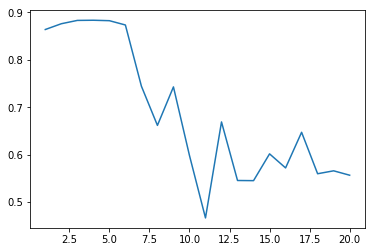

In [239]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_);

In [240]:
var_selected = pd.DataFrame(sorted(zip(map(lambda x: round(x), rfecv.ranking_), data.columns)), columns=['ranking', 'variables'])
pd.options.display.max_rows = 150
var_selected

,ranking,variables
0,1,Amount_avg_card_1
1,1,Amount_avg_card_7
2,1,Amount_avg_card_zip_7
3,1,Amount_max_card_zip_7
4,2,Amount_max_card_1
5,3,Amount_max_card_zip_1
6,4,Amount_max_card_7
7,5,Amount_max_merchant_1
8,6,Amount_max_card_14
9,7,Amount_max_card_zip_14


In [245]:
var_use = list(var_selected.iloc[:15,1])

In [247]:
df_res = Variables.filter(var_use,axis=1)

In [254]:
#df_res.to_csv('expert_variables.csv')

# Models

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [43]:
data = pd.read_csv('expert_variables.csv',index_col=0)

In [44]:
data['Fraud'] = df['Fraud']

In [45]:
data.head()

,Amount_avg_card_1,Amount_avg_card_7,Amount_avg_card_zip_7,Amount_max_card_zip_7,Amount_max_card_1,Amount_max_card_zip_1,Amount_max_card_7,Amount_max_merchant_1,Amount_max_card_14,Amount_max_card_zip_14,Amount_sum_card_1,Amount_avg_card_zip_1,Amount_sum_card_zip_1,Amount_sum_card_zip_14,Amount_sum_merchant_1,Fraud
0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,0
1,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,0
2,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,0
3,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,7.24,0
4,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,7.24,3.62,7.24,7.24,10.86,0


In [46]:
train_test = data.iloc[:83970,]
oot = data.iloc[83970:,]

In [76]:
train_test.shape, oot.shape

((83970, 16), (12427, 16))

In [47]:
Y = train_test['Fraud']
X = train_test.drop(columns='Fraud')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [49]:
X_oot = oot.drop(columns='Fraud')
y_oot = oot['Fraud']

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_oot.shape, y_oot.shape

((67176, 15), (16794, 15), (67176,), (16794,), (12427, 15), (12427,))

In [51]:
# Define performance measure metrics
def Fraud_test(model, X, Y):
    df = pd.DataFrame()
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)
    y_proba = y_proba[:,1]
    
    df['y_proba'] = y_proba
    df['y_pred'] = y_pred
    df['y_real'] = Y.values
    
    df.sort_values(by = 'y_proba',ascending=False,inplace=True)
    three_percent = df.iloc[:int(df.shape[0]*0.03),:]
    
    fdr = three_percent[three_percent['y_real']==1].shape[0]/sum(Y)
    
    return fdr

## Logistic Regression

In [89]:
d_log = {}
for c in [0.1,0.5,1,2,10]:
    log = LogisticRegression(C=c)
    log.fit(X_train,y_train)

    train_fdr = Fraud_test(log,X_train,y_train)
    test_fdr = Fraud_test(log,X_test,y_test)
    oot_fdr = Fraud_test(log,X_oot,y_oot)
    
    d_log[c] = [train_fdr,test_fdr,oot_fdr]

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWar

In [90]:
d_log

{0.1: [0.3988919667590028, 0.3670886075949367, 0.2737430167597765],
 0.5: [0.4002770083102493, 0.3670886075949367, 0.27932960893854747],
 1: [0.389196675900277, 0.36075949367088606, 0.2569832402234637],
 2: [0.3988919667590028, 0.37341772151898733, 0.30726256983240224],
 10: [0.40443213296398894, 0.37341772151898733, 0.27932960893854747]}

## Random Forest

In [92]:
d_rfc = {}
for estimator in [20,50,100,200,500]:
    for depth in [2,5,10,15,20]:
        rfc = RandomForestClassifier(n_estimators=estimator, max_depth=depth,random_state=0)
        rfc.fit(X_train,y_train)
        d_rfc[str(estimator)+'/'+str(depth)] = [Fraud_test(rfc,X_train,y_train),Fraud_test(rfc,X_test,y_test),Fraud_test(rfc,X_oot,y_oot)]


In [93]:
d_rfc

{'20/2': [0.6565096952908587, 0.5949367088607594, 0.37988826815642457],
 '20/5': [0.7506925207756233, 0.6835443037974683, 0.4245810055865922],
 '20/10': [0.9002770083102493, 0.8481012658227848, 0.5977653631284916],
 '20/15': [0.9833795013850416, 0.8481012658227848, 0.5698324022346368],
 '20/20': [1.0, 0.8227848101265823, 0.4972067039106145],
 '50/2': [0.6745152354570637, 0.6075949367088608, 0.4692737430167598],
 '50/5': [0.7686980609418282, 0.7025316455696202, 0.48044692737430167],
 '50/10': [0.9141274238227147, 0.8544303797468354, 0.6089385474860335],
 '50/15': [0.997229916897507, 0.8734177215189873, 0.5754189944134078],
 '50/20': [1.0, 0.8607594936708861, 0.5810055865921788],
 '100/2': [0.6759002770083102, 0.6139240506329114, 0.4692737430167598],
 '100/5': [0.7686980609418282, 0.689873417721519, 0.5586592178770949],
 '100/10': [0.9044321329639889, 0.8607594936708861, 0.6089385474860335],
 '100/15': [1.0, 0.879746835443038, 0.5977653631284916],
 '100/20': [1.0, 0.8734177215189873, 0.5

## Gradient Boosted Tree

In [95]:
d_gbc = {}

for estimator in [500,1000,1500]:
    gbc = GradientBoostingClassifier(learning_rate=0.1,n_estimators=estimator)
    gbc.fit(X_train,y_train)
    d_gbc[str(estimator)] = [Fraud_test(gbc,X_train,y_train),Fraud_test(gbc,X_test,y_test),Fraud_test(gbc,X_oot,y_oot)]

In [96]:
d_gbc

{'500': [0.9764542936288089, 0.8860759493670886, 0.3128491620111732],
 '1000': [0.9986149584487535, 0.9050632911392406, 0.4022346368715084],
 '1500': [1.0, 0.8987341772151899, 0.4245810055865922]}

## Naive Bayes

In [97]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [98]:
(Fraud_test(gnb,X_train,y_train),Fraud_test(gnb,X_test,y_test),Fraud_test(gnb,X_oot,y_oot))

(0.628808864265928, 0.5822784810126582, 0.41899441340782123)

# Result

In [54]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=10,random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [55]:
def Table(fea,lab):    
        
    prob=pd.DataFrame(rfc.predict_proba(fea))
    result=pd.concat([pd.DataFrame(lab).reset_index(),prob],axis=1)
    sort=result[['Fraud',1]].sort_values(by=1,ascending=False)
    sort=sort.reset_index().reset_index()

    groups=sort.groupby(pd.cut(sort.level_0,100))

    #initialize 
    CumRecord=0
    CumGood=0
    CumBad=0
    TotalGoods=len(sort[sort["Fraud"]==0])
    TotalBads=len(sort[sort["Fraud"]==1])

    GoodsPer=[]
    BadsPer=[]
    CumRecords=[]
    CumGoods=[]
    CumBads=[]
    CumGoodsPer=[]
    CumBadsPer=[]
    KS=[]
    FPR=[]

    bins=np.linspace(1,20,20)
    Records=groups.count().Fraud
    Goods=Records-(groups.sum().Fraud)
    Bads=groups.sum().Fraud

    #Convert series into a list
    RecordsList=Records.tolist()[:20]
    GoodsList=Goods.tolist()[:20]
    BadsList=Bads.tolist()[:20]

    for i in range(20):
        Record=RecordsList[i]
        Good=GoodsList[i]
        Bad=BadsList[i]

        GoodPer=Good/Record
        BadPer=Bad/Record
        CumRecord+=Record
        CumGood+=Good
        CumBad+=Bad
        CumGoodPer=CumGood/TotalGoods
        CumBadPer=CumBad/TotalBads

        GoodsPer.append(GoodPer)
        BadsPer.append(BadPer)
        CumRecords.append(CumRecord)
        CumGoods.append(CumGood)
        CumBads.append(CumBad)
        CumGoodsPer.append(CumGoodPer)
        CumBadsPer.append(CumBadPer)
        KS.append(CumBadPer-CumGoodPer)
        FPR.append(CumGood/CumBad)

    table=pd.DataFrame([bins.tolist(),RecordsList,GoodsList,BadsList,GoodsPer,BadsPer,
                      CumRecords,CumGoods,CumBads,
                      CumGoodsPer,CumBadsPer,KS,FPR]).transpose()
    table.columns=["Population Bin %","# Records","# Goods","# Bads",
                      "% Goods", "% Bads", "Total # Records",
                      "Cumulative Good","Cumulative Bad","% Good",
                      "% Bad (FDR)","KS","FPR"]                            
    return table

In [58]:
train = Table(X_train,y_train)
test = Table(X_test,y_test)
oot = Table(X_oot,y_oot)

In [57]:
train.head()

,Population Bin %,# Records,# Goods,# Bads,% Goods,% Bads,Total # Records,Cumulative Good,Cumulative Bad,% Good,% Bad (FDR),KS,FPR
0,1.0,672.0,83.0,589.0,0.123512,0.876488,672.0,83.0,589.0,0.001249,0.815789,0.814540,0.140917
1,2.0,672.0,623.0,49.0,0.927083,0.072917,1344.0,706.0,638.0,0.010624,0.883657,0.873033,1.106583
2,3.0,672.0,644.0,28.0,0.958333,0.041667,2016.0,1350.0,666.0,0.020315,0.922438,0.902123,2.027027
3,4.0,672.0,658.0,14.0,0.979167,0.020833,2688.0,2008.0,680.0,0.030216,0.941828,0.911612,2.952941
4,5.0,671.0,658.0,13.0,0.980626,0.019374,3359.0,2666.0,693.0,0.040118,0.959834,0.919716,3.847042


In [61]:
def FraudSaving(t=20,g=100):    
        
    prob=pd.DataFrame(rfc.predict_proba(X_oot))
    result=pd.concat([pd.DataFrame(y_oot).reset_index(),prob],axis=1)
    sort=result[['Fraud',1]].sort_values(by=1,ascending=False)
    sort=sort.reset_index().reset_index()

    groups=sort.groupby(pd.cut(sort.level_0,g))

    bins=(np.linspace(1,g,100)/g)*100
    Records=groups.count().Fraud
    Goods=Records-(groups.sum().Fraud)
    Bads=groups.sum().Fraud

    #Convert series into a list
    binsList=bins.tolist()[:t]
    RecordsList=Records.tolist()[:t]
    GoodsList=Goods.tolist()[:t]
    BadsList=Bads.tolist()[:t]

    #declare list
    FraudSavingL=[]
    LostSalesL=[]
    OverallSavingL=[]
    
    #initialize
    FraudSaving=0
    LostSales=0
    OverallSaving=0
    
    for i in range(t):
        Record=RecordsList[i]
        Good=GoodsList[i]
        Bad=BadsList[i]

        FraudSaving+=2000*Bad
        LostSales+=50*Good
        OverallSaving+=2000*Bad-50*Good
        
        FraudSavingL.append(FraudSaving)
        LostSalesL.append(LostSales)
        OverallSavingL.append(OverallSaving)


    table=pd.DataFrame([binsList,RecordsList,GoodsList,BadsList,
                        FraudSavingL,LostSalesL,OverallSavingL]).transpose()
    table.columns=["Population Bin %","# Records","# Goods","# Bads",
                     "Fraud Saving","Lost Sales","Overall Savings"]                            
    return table

In [62]:
FraudSavingT=FraudSaving(t=100)

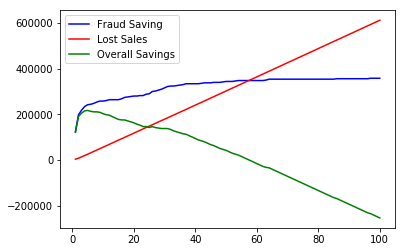

In [64]:
plt.plot('Population Bin %',"Fraud Saving",data=FraudSavingT,color='blue')
plt.plot('Population Bin %',"Lost Sales",data=FraudSavingT,color='red')
plt.plot('Population Bin %',"Overall Savings",data=FraudSavingT,color='green')
plt.legend(['Fraud Saving','Lost Sales','Overall Savings'])
plt.show()

In [67]:
FraudSavingT[FraudSavingT['Overall Savings'] == max(FraudSavingT['Overall Savings'])]

,Population Bin %,# Records,# Goods,# Bads,Fraud Saving,Lost Sales,Overall Savings
4,5.0,124.0,120.0,4.0,242000.0,25050.0,216950.0


Therefore, looking at 5% of total population would optimize the company's overall savings in this scenario.